# Ex1. Image Sensing and Acquisition (30 marks)

## 1.1. Read a given color image (‘Ex1.jpg’). Display the original image and its tricolor elements: Red (R), Green (G) and Blue (B) separately

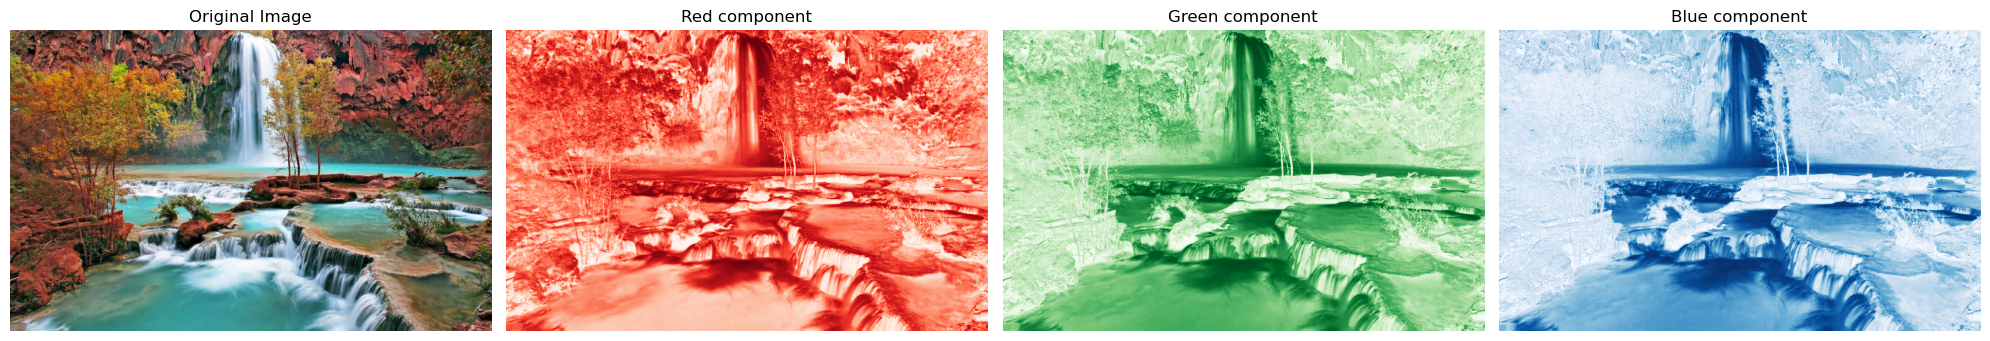

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Data/Ex1.jpg'
image = Image.open(img_path)

# Convert the image to RGB if it is not
image = image.convert('RGB')

# Split the image into R, G, B components
r, g, b = image.split()

# Display the original and RGB components
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Red component
axs[1].imshow(np.asarray(r), cmap='Reds')
axs[1].set_title('Red component')
axs[1].axis('off')

# Green component
axs[2].imshow(np.asarray(g), cmap='Greens')
axs[2].set_title('Green component')
axs[2].axis('off')

# Blue component
axs[3].imshow(np.asarray(b), cmap='Blues')
axs[3].set_title('Blue component')
axs[3].axis('off')

plt.tight_layout()
plt.show()


## 1.2. Reorder the three components to create a new image as (BRG).

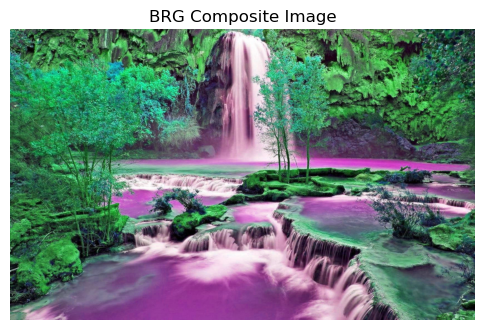

In [2]:
# Merge the channels in BRG order instead of the standard RGB
brg_image = Image.merge("RGB", (b, r, g))

# Display the BRG composite image
plt.figure(figsize=(6,6))
plt.imshow(brg_image)
plt.title('BRG Composite Image')
plt.axis('off')
plt.show()


## 1.3. Make the original image increase the contrast by a gamma correction scale 1.2, then darker 80% using a scale value.

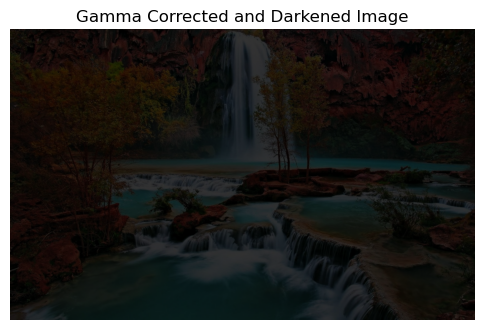

In [3]:
from PIL import ImageEnhance

# Perform gamma correction
gamma_corrected = image.point(lambda p: 255 * ((p / 255) ** 1.2))

# Darken the image by 80% using the enhance function with a scale of 0.2
enhancer = ImageEnhance.Brightness(gamma_corrected)
darkened_image = enhancer.enhance(0.2)  # 20% of the original brightness

# Display the contrast enhanced and darkened image
plt.figure(figsize=(6,6))
plt.imshow(darkened_image)
plt.title('Gamma Corrected and Darkened Image')
plt.axis('off')
plt.show()


## 1.4. Quantize and display the grayscale image using 2 bits, 4 bits, 6 bits and 8 bits. Visualize the effect of the operations.

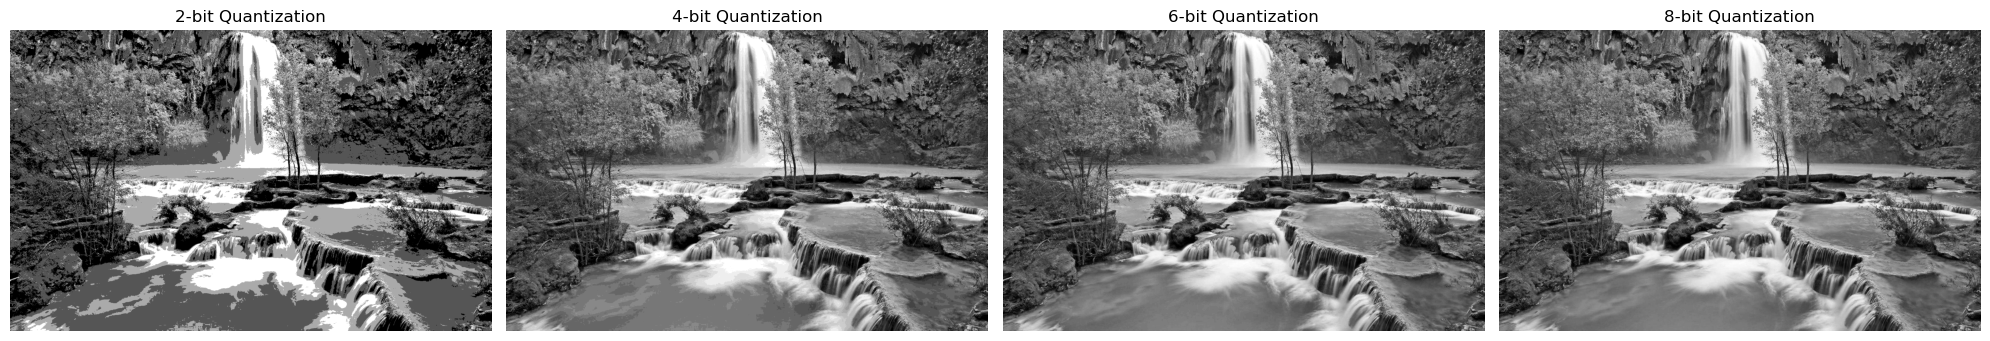

In [4]:
# Convert the image to grayscale
gray_image = image.convert('L')

# Function to quantize the image
def quantize_image(img, bits):
    levels = 2**bits
    quantized_img = img.point(lambda x: int((x * levels) / 256) * (256 // levels))
    return quantized_img

# Quantize the grayscale image using 2, 4, 6, and 8 bits
bit_depths = [2, 4, 6, 8]
quantized_images = [quantize_image(gray_image, bits) for bits in bit_depths]

# Display the quantized images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, (quant_img, bits) in enumerate(zip(quantized_images, bit_depths)):
    axs[i].imshow(quant_img, cmap='gray')
    axs[i].set_title(f'{bits}-bit Quantization')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


# Ex2. Geometrics Operations, Histogram Equalization (25 marks)

## 2.1. Read a given grayscale image (‘Ex2.jpg’). Contrast the original image with:
a. logarithm transformation with the constant c = 256/log(512)
b. piecewise linear transformation with

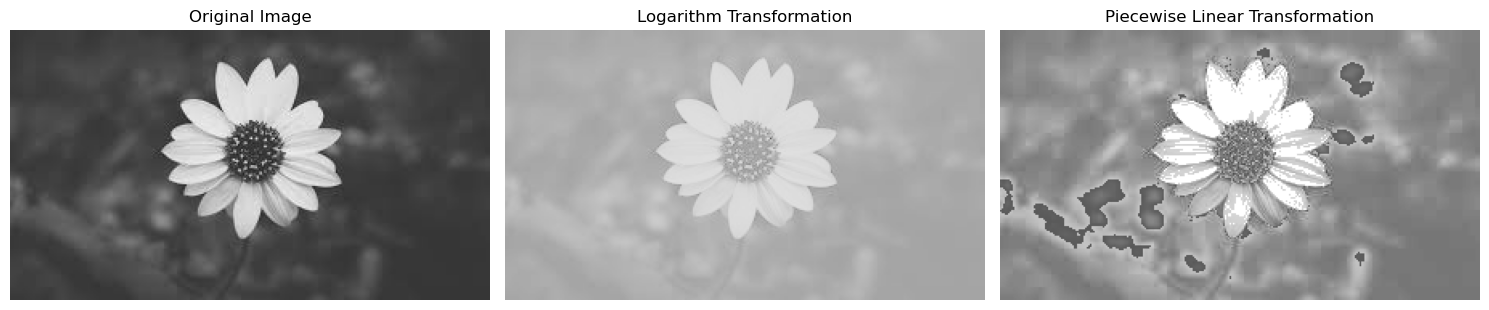

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the image
img_path = 'Data/Ex2.jfif'
original_img = Image.open(img_path)

# Convert image to numpy array
img_array = np.array(original_img)

# Define the logarithm transformation function
def logarithm_transformation(r, c):
    return c * np.log(1 + r)

# Define the piecewise linear transformation function
def piecewise_linear_transformation(r):
    if r <= 93:
        return 2 * r + 10
    elif r <= 168:
        return r - 5
    elif r <= 214:
        return r
    else:
        return 255

# Calculate the constant c for logarithm transformation
c = 256 / math.log(512)

# Apply the logarithm transformation
log_transformed = logarithm_transformation(img_array, c).astype(np.uint8)

# Apply the piecewise linear transformation
piecewise_linear_transformed = np.vectorize(piecewise_linear_transformation)(img_array).astype(np.uint8)

# Show the original and transformed images using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(original_img, cmap='gray')
axs[0].title.set_text('Original Image')
axs[0].axis('off')

# Logarithm transformed image
axs[1].imshow(log_transformed, cmap='gray')
axs[1].title.set_text('Logarithm Transformation')
axs[1].axis('off')

# Piecewise linear transformed image
axs[2].imshow(piecewise_linear_transformed, cmap='gray')
axs[2].title.set_text('Piecewise Linear Transformation')
axs[2].axis('off')

# Display the plot
plt.tight_layout()
plt.show()


## 2.2. Peform three different actions:
a. flip left to right using fliplr
b. rotate clockwise 180 degrees using imrotate
c. crop ½ central of the image using imcro

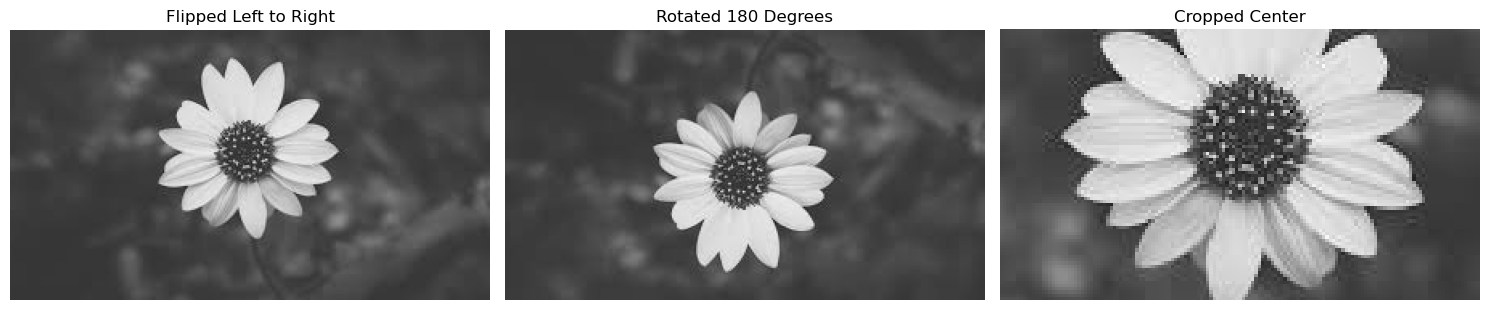

In [6]:
# Perform the specified actions on the original image

# a. Flip left to right
flipped_lr = original_img.transpose(Image.FLIP_LEFT_RIGHT)

# b. Rotate 180 degrees clockwise
rotated_180 = original_img.rotate(180)

# c. Crop 1/2 central of the image
width, height = original_img.size
left = width / 4
top = height / 4
right = 3 * width / 4
bottom = 3 * height / 4
cropped_center = original_img.crop((left, top, right, bottom))

# Show the results of the transformations using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Flipped left to right
axs[0].imshow(flipped_lr, cmap='gray')
axs[0].title.set_text('Flipped Left to Right')
axs[0].axis('off')

# Rotated 180 degrees
axs[1].imshow(rotated_180, cmap='gray')
axs[1].title.set_text('Rotated 180 Degrees')
axs[1].axis('off')

# Cropped center
axs[2].imshow(cropped_center, cmap='gray')
axs[2].title.set_text('Cropped Center')
axs[2].axis('off')

# Display the plot
plt.tight_layout()
plt.show()


## 2.3 Plot the histogram of the original image. Perform global histogram equalization

C:\Users\SonSiHo\AppData\Roaming\Python\Python311\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


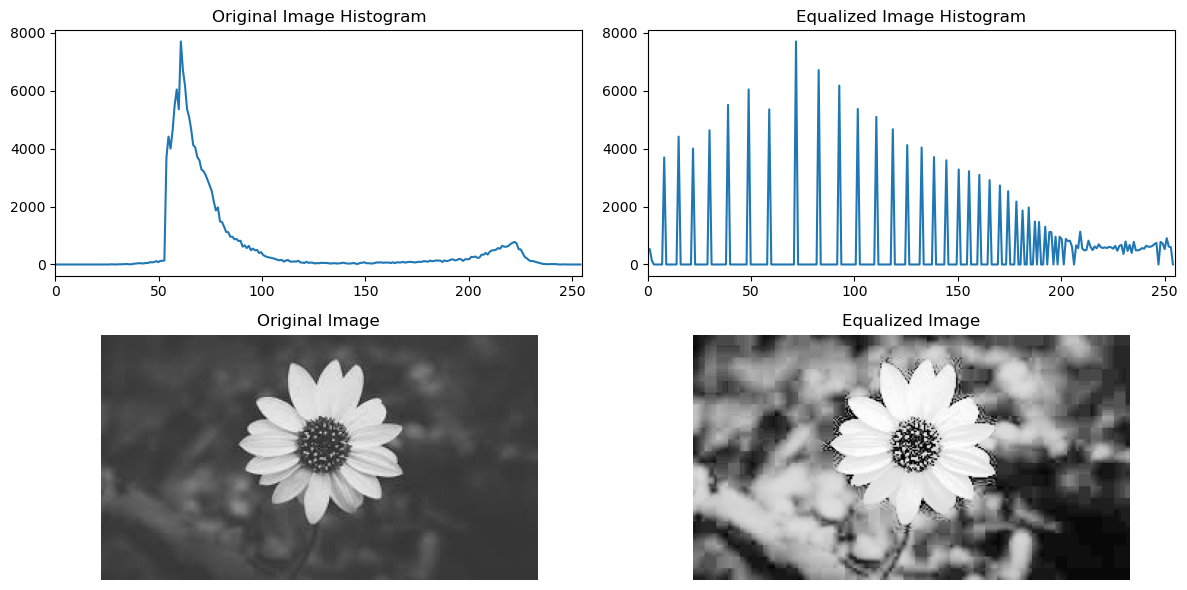

In [7]:
from skimage import exposure

# Calculate the histogram of the original image
histogram, bin_edges = np.histogram(img_array.flatten(), bins=256, range=(0, 255))

# Perform global histogram equalization
equalized_img_array = exposure.equalize_hist(img_array)

# Convert the result to 'uint8' to handle the proper image display
equalized_img = (equalized_img_array * 255).astype(np.uint8)

# Calculate the histogram of the equalized image
equalized_histogram, equalized_bin_edges = np.histogram(equalized_img.flatten(), bins=256, range=(0, 255))

# Plot the histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Original image histogram
axs[0, 0].plot(bin_edges[0:-1], histogram)
axs[0, 0].title.set_text('Original Image Histogram')
axs[0, 0].set_xlim([0, 255])

# Equalized image histogram
axs[0, 1].plot(equalized_bin_edges[0:-1], equalized_histogram)
axs[0, 1].title.set_text('Equalized Image Histogram')
axs[0, 1].set_xlim([0, 255])

# Display original image
axs[1, 0].imshow(original_img, cmap='gray')
axs[1, 0].title.set_text('Original Image')
axs[1, 0].axis('off')

# Display equalized image
axs[1, 1].imshow(equalized_img, cmap='gray')
axs[1, 1].title.set_text('Equalized Image')
axs[1, 1].axis('off')

# Display the plot
plt.tight_layout()
plt.show()


## 3. Plot the histogram of the original image. Perform global histogram equalization.

In [8]:
# Function to plot an image and its histogram
def plot_image_and_histogram(image, title):
    # Calculate histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the image and histogram
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].imshow(image, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title(f'{title} Image')

    axs[1].plot(histogram, color='black')
    axs[1].set_title(f'{title} Histogram')
    axs[1].set_xlim([0, 256])

    # Save the plot to a file
    plot_path = f'Data/{title.replace(" ", "_").lower()}_and_histogram.png'
    plt.savefig(plot_path)
    plt.close()

    return plot_path

# 3. Plot the histogram of the original image
original_and_histogram_path = plot_image_and_histogram(image, 'Original')

# Perform global histogram equalization
equalized = cv2.equalizeHist(image)

# Save the equalized image and plot its histogram
equalized_path = 'Data/equalized.jpg'
cv2.imwrite(equalized_path, equalized)
equalized_and_histogram_path = plot_image_and_histogram(equalized, 'Equalized')

original_and_histogram_path, equalized_and_histogram_path


NameError: name 'cv2' is not defined

## 4. Perform Contrast Local Adaptive Histogram Equalization (CLAHE) with the clipping ratio = 0.3.

In [ ]:
from skimage import exposure

# Apply CLAHE
# Create a CLAHE object with a clipping limit of 0.3
clahe = exposure.equalize_adapthist(img_array, clip_limit=0.3)

# Convert the result to 'uint8' to handle the proper image display
clahe_img = (clahe * 255).astype(np.uint8)

# Calculate the histogram of the CLAHE image
clahe_histogram, clahe_bin_edges = np.histogram(clahe_img.flatten(), bins=256, range=(0, 255))

# Plot the histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# CLAHE image histogram
axs[0].plot(clahe_bin_edges[0:-1], clahe_histogram)
axs[0].title.set_text('CLAHE Image Histogram')
axs[0].set_xlim([0, 255])

# Display CLAHE image
axs[1].imshow(clahe_img, cmap='gray')
axs[1].title.set_text('CLAHE Image')
axs[1].axis('off')

# Display the plot
plt.tight_layout()
plt.show()


# Ex3. Image Comparison (20 marks)

## 3.1. Given two grayscale images named ‘Ex3a.png’ and ‘Ex3b.png’. Display two images in the same figure

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img_a = mpimg.imread('Data/Ex3a.png')
img_b = mpimg.imread('Data/Ex3b.png')

# Create a figure to display the two images
fig, axs = plt.subplots(1, 2, figsize=(10, 20))

# Display Ex3a.png on the left
axs[0].imshow(img_a, cmap='gray')
axs[0].axis('off')  # Turn off axis
axs[0].set_title('Ex3a.png')

# Display Ex3b.png on the right
axs[1].imshow(img_b, cmap='gray')
axs[1].axis('off')  # Turn off axis
axs[1].set_title('Ex3b.png')

# Show the figure
plt.show()


## 3.2. Find differences between two images. Enhance contrast increases 40%, brighter 150%

In [ ]:
from skimage import exposure

# Function to enhance the contrast and brightness
def enhance_image(image, contrast_increase, brightness_increase):
    # Convert the image to float to prevent data type overflow during operations
    image_float = image.astype(float)

    # Increase contrast
    # Compute the percentiles and stretch the intensity values
    p2, p98 = np.percentile(image_float, (2, 98))
    image_contrast = exposure.rescale_intensity(image_float, in_range=(p2, p98))

    # Increase brightness
    # Ensure the maximum value is within the valid range
    image_bright = image_contrast * (1 + brightness_increase / 100)
    image_bright = np.clip(image_bright, 0, 255)

    return image_bright

# Apply enhancements to both images
img_a_enhanced = enhance_image(img_a, 40, 150)
img_b_enhanced = enhance_image(img_b, 40, 150)

# Compute the absolute difference between the enhanced images
img_difference = np.abs(img_a_enhanced - img_b_enhanced)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display enhanced images and the difference
axes[0].imshow(img_a_enhanced, cmap='gray')
axes[0].set_title('Enhanced Ex3a')
axes[0].axis('off')

axes[1].imshow(img_b_enhanced, cmap='gray')
axes[1].set_title('Enhanced Ex3b')
axes[1].axis('off')

# For the difference, also apply contrast stretching to make differences more visible
p2, p98 = np.percentile(img_difference, (2, 98))
img_difference_enhanced = exposure.rescale_intensity(img_difference, in_range=(p2, p98))

axes[2].imshow(img_difference_enhanced, cmap='gray')
axes[2].set_title('Difference (Contrast Enhanced)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Ex4. Image Histogram and Equalization (25 marks)

## 4.1 Given a color image named Ex4.jfif. Plot the original image and its histogram. Save this image as ‘Color_Histogram.jpeg’.


In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Load the image
image = cv2.imread('Data/Ex4.jfif')

# Convert image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate the histogram for each channel
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

# Plot the original image
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot the histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.xlabel('Bin')
plt.ylabel('Frequency')

# Save the histogram plot as 'Color_Histogram.jpeg'
histogram_path = 'Data/Color_Histogram.jpeg'
plt.savefig(histogram_path)
plt.close()

histogram_path

## 2. Apply histogram equalization for the original image. Plot the image and its histogram after being equalized. Save this figure as ‘Equalization_Histogram.jpeg’.


In [ ]:
# Function to apply histogram equalization to an RGB image
def equalize_histogram_rgb(img_rgb):
    # Split the image into its respective channels, then equalize each one
    channels = cv2.split(img_rgb)
    eq_channels = [cv2.equalizeHist(channel) for channel in channels]
    # Merge the channels back together and convert back to RGB
    eq_image = cv2.merge(eq_channels)
    eq_image_rgb = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    return eq_image_rgb

# Apply histogram equalization to the original RGB image
equalized_image = equalize_histogram_rgb(image_rgb)

# Calculate histogram for each channel after equalization
for i, col in enumerate(color):
    hist = cv2.calcHist([equalized_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

# Plot the equalized image
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.axis('off')

# Plot the histogram for the equalized image
plt.subplot(1, 2, 2)
plt.title('Histogram After Equalization')
plt.xlabel('Bin')
plt.ylabel('Frequency')

# Save the histogram plot as 'Equalization_Histogram.jpeg'
equalization_histogram_path = 'Data/Equalization_Histogram.jpeg'
plt.savefig(equalization_histogram_path)
plt.close()

equalization_histogram_path


## 3. Apply adaptive equalization for the original image with two kernels (default and 5x5). Save this figure as ‘Adaptive_Equalization_Histogram.jpeg’.

In [ ]:
from skimage import exposure

# Function to apply adaptive histogram equalization to an RGB image with different kernel sizes
def adaptive_equalize_histogram_rgb(img_rgb, kernel_size=None):
    # Convert RGB to HSV since equalization should be done on the intensity channel
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(img_hsv)

    # Apply adaptive equalization on the intensity channel
    if kernel_size is None:
        v_eq = exposure.equalize_adapthist(v)
    else:
        v_eq = exposure.equalize_adapthist(v, kernel_size=kernel_size)

    # Convert scale of pixel intensities from 0-1 to 0-255
    v_eq = (255 * v_eq).astype(np.uint8)

    # Merge the HSV channels back together
    img_hsv_eq = cv2.merge([h, s, v_eq])

    # Convert back to RGB
    img_rgb_eq = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)
    return img_rgb_eq

# Apply adaptive equalization with default kernel
adaptive_eq_image_default = adaptive_equalize_histogram_rgb(image_rgb)

# Apply adaptive equalization with 5x5 kernel
adaptive_eq_image_5x5 = adaptive_equalize_histogram_rgb(image_rgb, (5, 5))

# Calculate histograms for the equalized images
hist_adaptive_default = cv2.calcHist([adaptive_eq_image_default], [0], None, [256], [0, 256])
hist_adaptive_5x5 = cv2.calcHist([adaptive_eq_image_5x5], [0], None, [256], [0, 256])

# Plot the adaptive equalized images and their histograms
plt.figure(figsize=(14, 6))

# Plot the default kernel adaptive equalized image
plt.subplot(2, 2, 1)
plt.imshow(adaptive_eq_image_default)
plt.title('Adaptive Equalized Image (Default)')
plt.axis('off')

# Plot the histogram for the default kernel adaptive equalized image
plt.subplot(2, 2, 2)
plt.plot(hist_adaptive_default, color='r')
plt.title('Histogram (Default)')
plt.xlim([0, 256])
plt.xlabel('Bin')
plt.ylabel('Frequency')

# Plot the 5x5 kernel adaptive equalized image
plt.subplot(2, 2, 3)
plt.imshow(adaptive_eq_image_5x5)
plt.title('Adaptive Equalized Image (5x5)')
plt.axis('off')

# Plot the histogram for the 5x5 kernel adaptive equalized image
plt.subplot(2, 2, 4)
plt.plot(hist_adaptive_5x5, color='r')
plt.title('Histogram (5x5)')
plt.xlim([0, 256])
plt.xlabel('Bin')
plt.ylabel('Frequency')

# Save the histogram plot as 'Adaptive_Equalization_Histogram.jpeg'
adaptive_equalization_histogram_path = 'Data/Adaptive_Equalization_Histogram.jpeg'
plt.savefig(adaptive_equalization_histogram_path)
plt.close()

adaptive_equalization_histogram_path
